# IMPORT LIBRARIES

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Women Dresses Reviews Dataset .csv")
df

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [6]:
df.tail()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1
23485,23485,56,General,Jackets,Jackets,984,NaN,Super cute jacket .perfect for fall i can't st...,0,5,1


In [7]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [8]:
df.shape

(23486, 11)

In [9]:
df.isna().sum()

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [10]:
df['division_name'] = df['division_name'].fillna("Not Specified")
df['department_name'] = df['department_name'].fillna("Not Specified")
df['class_name'] = df['class_name'].fillna("Not Specified")

# For text columns
df['title'] = df['title'].fillna("No Title")
df['review_text'] = df['review_text'].fillna("No Review")

In [11]:
df.isna().sum()

s.no                    0
age                     0
division_name           0
department_name         0
class_name              0
clothing_id             0
title                   0
review_text             0
alike_feedback_count    0
rating                  0
recommend_index         0
dtype: int64

In [12]:
df=df.drop(['s.no','age','division_name','department_name','class_name','clothing_id','title','alike_feedback_count','rating'],axis=1)
df

,review_text,recommend_index
0,Like other reviewers i was hesitant to spend t...,1
1,As is true of a bunch of the fall clothing pho...,1
2,"I so wanted this skirt to work, love the desig...",0
3,Love love this! i was hesitant to buy this at ...,1
4,I absolutely love the retro look of this swims...,1
...,...,...
23481,I oot this dress in the blue. it fits great--h...,1
23482,I was very patient with this dress. i was wait...,1
23483,"The deep v doesn't gape, and flatters the neck...",1
23484,"I saw this dress online this morning, went int...",1


In [13]:
df=df.sample(frac=1)
df

,review_text,recommend_index
1300,"I'm a big fan of left of center as a brand, an...",1
17554,"As the title suggests, i am very skeptical and...",1
20114,"First the good: what a beautiful, figure flatt...",1
7145,I love this dress and had so hoped to wear it ...,1
4593,"So so cute. i am 5' 7"" 150-155lbs and the 10 f...",1
...,...,...
6837,I'm not a western girl but this dress is so ad...,1
531,I love it! it's cute and short and shows off m...,1
3474,"Wonderful, slimming leggings. snappy and a gre...",1
3980,"I love the colors and style of this poncho, ho...",0


In [14]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,review_text,recommend_index
0,"I'm a big fan of left of center as a brand, an...",1
1,"As the title suggests, i am very skeptical and...",1
2,"First the good: what a beautiful, figure flatt...",1
3,I love this dress and had so hoped to wear it ...,1
4,"So so cute. i am 5' 7"" 150-155lbs and the 10 f...",1
...,...,...
23481,I'm not a western girl but this dress is so ad...,1
23482,I love it! it's cute and short and shows off m...,1
23483,"Wonderful, slimming leggings. snappy and a gre...",1
23484,"I love the colors and style of this poncho, ho...",0


# Preprocessing Text Data

In [15]:
def wordopt(review_text): #creating function to process text
    text=review_text.lower()
    text=re.sub('\[.*?\]','',review_text)
    text=re.sub("\\W"," ",review_text)
    text=re.sub('https?://\S+|www\.\S+','',review_text)
    text=re.sub('<.*?>+','',review_text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',review_text)
    text=re.sub('\n','',review_text)
    text=re.sub('\w*\d\w*','',review_text)
    return text

In [16]:
df["review_text"]=df["review_text"].apply(wordopt)
df

,review_text,recommend_index
0,"I'm a big fan of left of center as a brand, an...",1
1,"As the title suggests, i am very skeptical and...",1
2,"First the good: what a beautiful, figure flatt...",1
3,I love this dress and had so hoped to wear it ...,1
4,"So so cute. i am ' "" - and the fit me perfect...",1
...,...,...
23481,I'm not a western girl but this dress is so ad...,1
23482,I love it! it's cute and short and shows off m...,1
23483,"Wonderful, slimming leggings. snappy and a gre...",1
23484,"I love the colors and style of this poncho, ho...",0


# Data Visualization

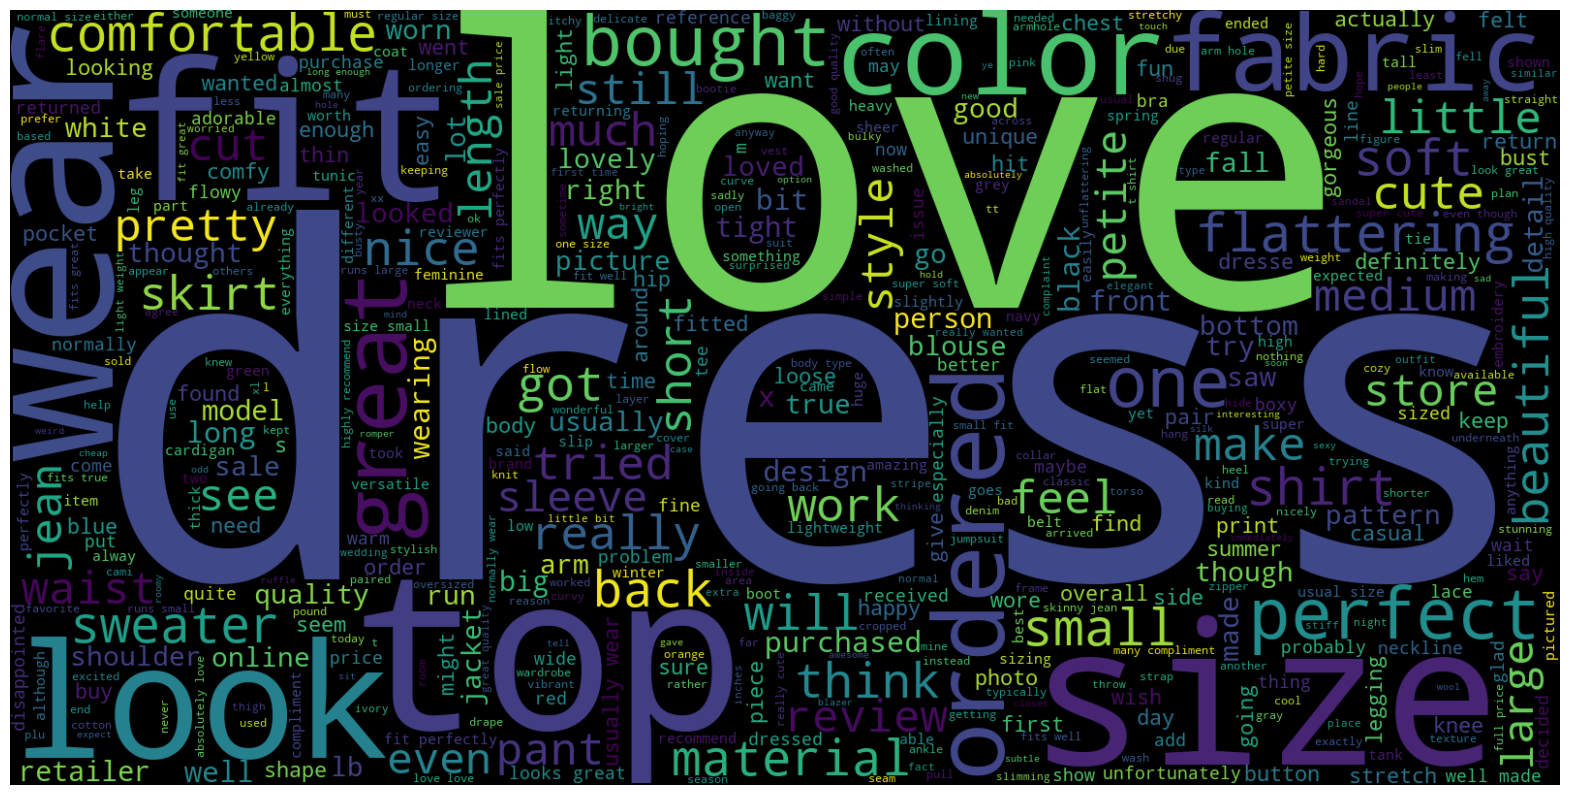

In [17]:
text=' '.join([word for word in df['review_text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Splitting

In [18]:
# x=df['recommend_index']
# y=df['review_text']
# print(x)
# print(y)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Now try accessing
x = df['review_text']
y = df['recommend_index']
print(x.head())
print(y.head())

0    I'm a big fan of left of center as a brand, an...
1    As the title suggests, i am very skeptical and...
2    First the good: what a beautiful, figure flatt...
3    I love this dress and had so hoped to wear it ...
4    So so cute. i am ' " - and the  fit me perfect...
Name: review_text, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: recommend_index, dtype: int64


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(17614,) (5872,) (17614,) (5872,)


# NLP

In [21]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train) #train-fit
xv_test=vectorization.transform(x_test)#test-transform

In [22]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 717009 stored elements and shape (17614, 11969)>

In [23]:
xv_train.shape

(17614, 11969)

In [24]:
xv_test.shape

(5872, 11969)

# Model Building Algorithms

## Logistic Regression

In [26]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [28]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([1, 1, 0, ..., 1, 1, 1])

In [29]:
pred_lt2=LR.predict(xv_train)
pred_lt2

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [32]:
print(confusion_matrix(y_test,pred_lr1))

[[ 514  473]
 [ 153 4732]]


In [34]:
print(confusion_matrix(y_train,pred_lt2))

[[ 1924  1261]
 [  324 14105]]


In [35]:
print(accuracy_score(y_test,pred_lr1))

0.8933923705722071


In [36]:
print(accuracy_score(y_train,pred_lt2))

0.9100147609855797


# Naive Bayes Theorem

## MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(xv_train,y_train)
predict1=model1.predict(xv_test)
predict1

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(xv_train,y_train)
predict2 = model2.predict(xv_train)
predict2

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
print(accuracy_score(y_test,predict1))

0.8342983651226158


In [41]:
print(accuracy_score(y_train,predict2))

0.829510616555013


# BernoulliNB

In [42]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(xv_train,y_train)
predict3 = model3.predict(xv_test)
predict3

array([1, 1, 0, ..., 1, 1, 1])

In [43]:
from sklearn.naive_bayes import BernoulliNB
model4 = BernoulliNB()
model4.fit(xv_train,y_train)
predict4 = model4.predict(xv_train)
predict4

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
print(accuracy_score(y_test,predict3))

0.8785762942779292


In [45]:
print(accuracy_score(y_train,predict4))

0.8941183149767231
